**Installing dependent packages**

In [1]:
# installing Hugging Face transformer
!pip install -q transformers

     |████████████████████████████████| 2.8 MB 12.8 MB/s 
     |████████████████████████████████| 636 kB 59.0 MB/s 
     |████████████████████████████████| 3.3 MB 50.9 MB/s 
     |████████████████████████████████| 895 kB 45.8 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 


In [2]:
# installing YouTube Transcript API (https://github.com/jdepoix/youtube-transcript-api)

!pip install -q youtube_transcript_api

In [3]:
#To immediately use a model on a given text, transformers provide the pipeline API. Pipelines group together a pretrained model with the preprocessing that was used during that model's training.
#Therefore, using pipleline we are going to define that we are doing text summarization.
 
from transformers import pipeline


from youtube_transcript_api import YouTubeTranscriptApi


In [13]:
#Transformer Summary pipeline
#By default it uses BERT Model with PyTorch
#it's an advantage for us as if I use Tensorflow I have to specify the model configurations separately as arguments
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

**To get the transcript of the video**

In [4]:
#URL of the target YouTube video
youtube_video = "https://www.youtube.com/watch?v=UQYoWwHg3qA"

In [5]:
#Since, in most of the links the YouTube Id is mentioned at the end and after the =. Thus, we can simply use split function for the same.
video_id = youtube_video.split("=")[1] #as we want the second element of the list

In [6]:
video_id

'UQYoWwHg3qA'

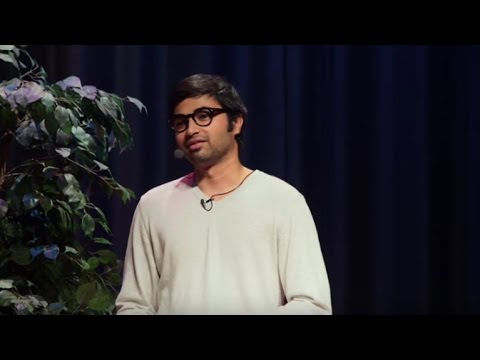

In [7]:
#just to check the display of our video
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [10]:
#To get transcripts of a video id
#Please note that some videos do not have a transcript and some videos have transcripts in different languages.
#For this project, I have only considered a video with a transcript in English language

transcript = YouTubeTranscriptApi.get_transcript(video_id)

#You can also add the languages param if you want to make sure the transcripts are retrieved in your desired language (it defaults to english)


In [11]:
#As this transcript is a JSON object, we will get the dictionary as the output. 
transcript[0:5]

[{'duration': 7.0,
  'start': 0.0,
  'text': 'Translator: Rea Bedalli\nReviewer: Saúl Chinchilla'},
 {'duration': 1.406, 'start': 12.37, 'text': 'Good afternoon,'},
 {'duration': 2.292, 'start': 14.016, 'text': 'My name is Suresh Jayakar,'},
 {'duration': 2.439,
  'start': 16.308,
  'text': 'and I am a user experience designer.'},
 {'duration': 3.18,
  'start': 18.764,
  'text': 'I work at a local agency called Kluge.'}]

In [12]:
#We just need the text from the dictionary to do the summarization

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

4825


**Summarizing the text using Summarizer**

In [18]:
#As BERT models couldn't process this large text or tokens. 
#So, we are trying to create chunks of the the I/P text

#taking batch size = 800
num_iters = int(len(result)/800)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 800
  end = (i + 1) * 800
  out = summarizer(result[start:end], min_length=10, max_length=100)
  out = out[0]
  out = out['summary_text']
  summarized_text.append(out)

print(summarized_text)

Your max_length is set to 100, but you input_length is only 12. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


[' Suresh Jayakar: Design thinking is a process, a way to solve problems . Design thinking encourages us to think divergently, to think outside the box . We often look at problems through a microscope, to look at the big picture, to see how things work from a holistic perspective .', " There weren't many grocery stores nearby in Southern California, where a lot of people live, and we had trouble finding bananas, apples, and tomatoes . The solution is to solve people's problems, and then create solutions that can be tested and validated .", ' In South L.A., many parts of it are described as food deserts . The federal government defines a food desert as a neighborhood where fresh fruits and vegetables are not easily accessible to people to buy . Without a reliable means of transport getting to a grocery store is difficult .', " Some of the popular grocery delivery services aren't available in parts of South L.A. Even if people were willing to pay that premium, it's simply not available f

In [19]:
#number of words in summary
len(str(summarized_text))

1752

In [20]:
str(summarized_text)

'[\' Suresh Jayakar: Design thinking is a process, a way to solve problems . Design thinking encourages us to think divergently, to think outside the box . We often look at problems through a microscope, to look at the big picture, to see how things work from a holistic perspective .\', " There weren\'t many grocery stores nearby in Southern California, where a lot of people live, and we had trouble finding bananas, apples, and tomatoes . The solution is to solve people\'s problems, and then create solutions that can be tested and validated .", \' In South L.A., many parts of it are described as food deserts . The federal government defines a food desert as a neighborhood where fresh fruits and vegetables are not easily accessible to people to buy . Without a reliable means of transport getting to a grocery store is difficult .\', " Some of the popular grocery delivery services aren\'t available in parts of South L.A. Even if people were willing to pay that premium, it\'s simply not av